In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ast
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

In [11]:
df = pd.read_csv('Input/attribution_data.csv')
if 'Source' in df.columns:
    df.rename(columns={'Source':'Default channel group'},inplace=True)
    
df['Default channel group'] = df['Default channel group'].apply(ast.literal_eval)

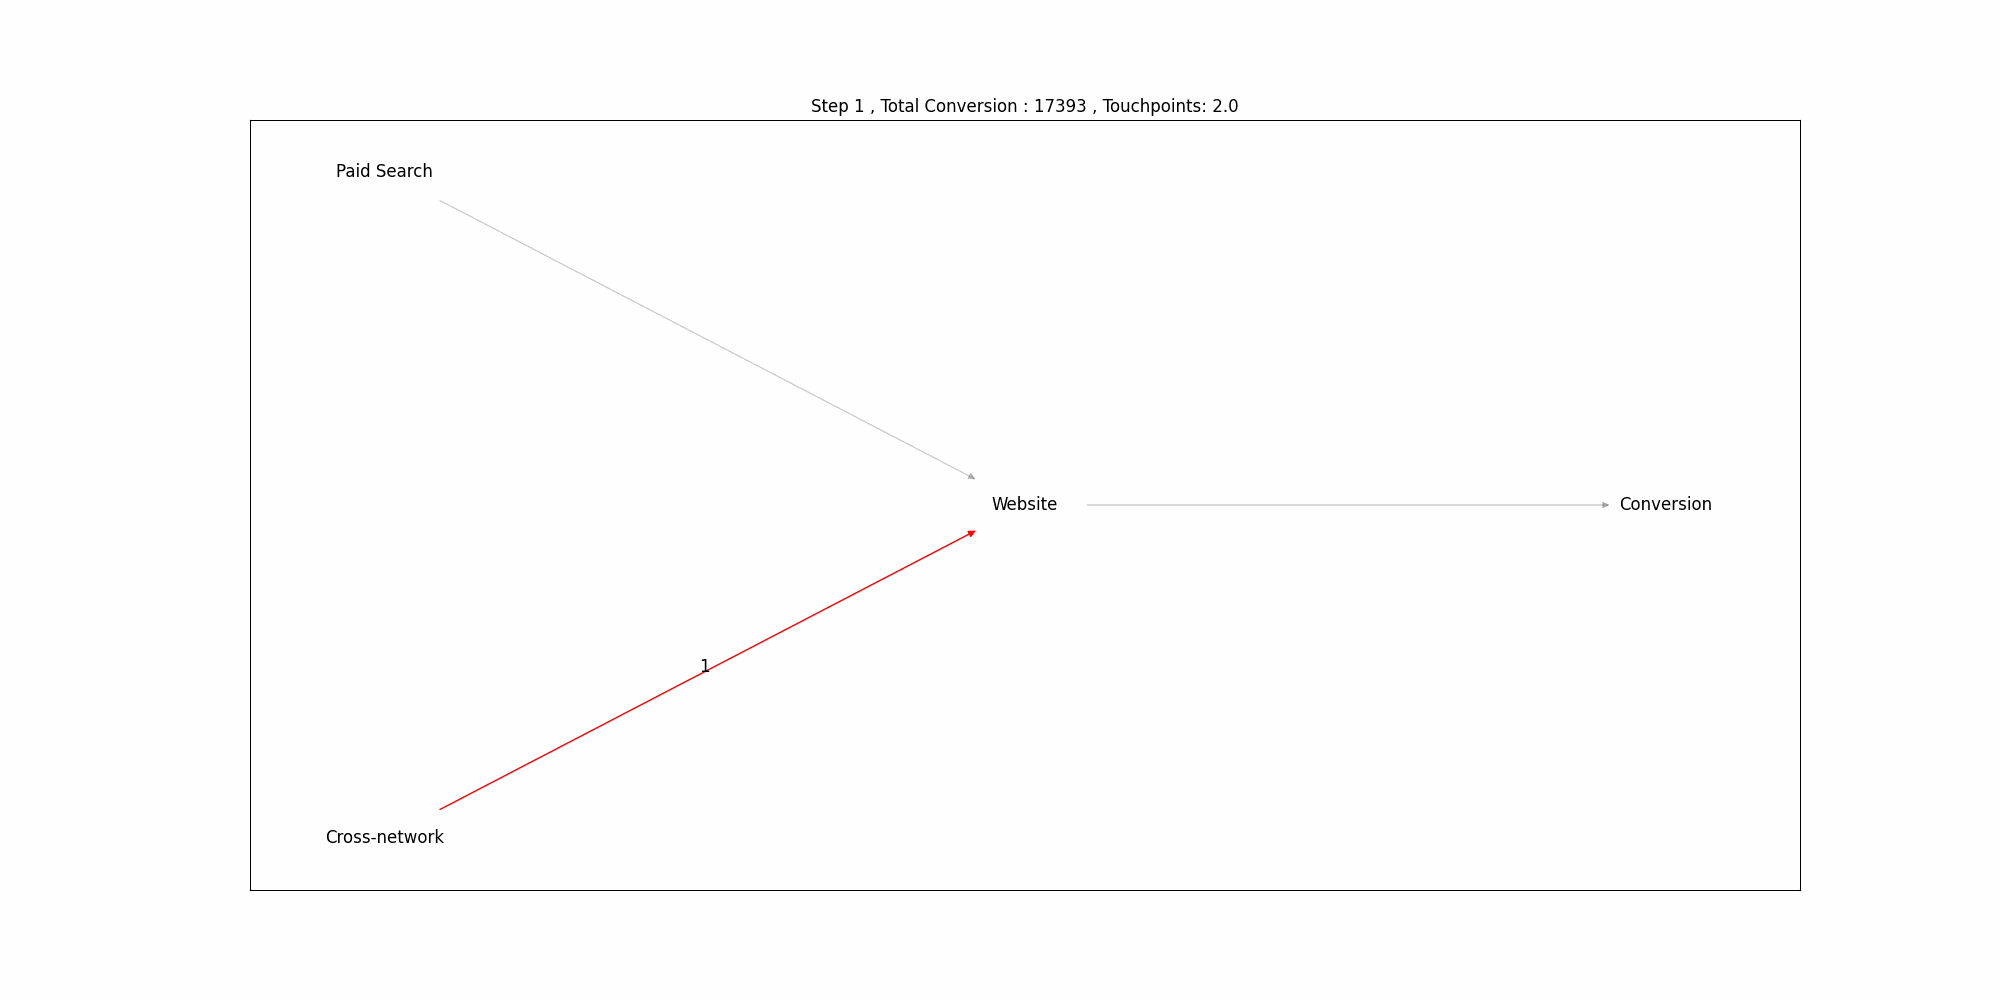

In [12]:
i = 28
conv = df['Conversions'][i]
val = df['Default channel group'][i]
tps = df['Touchpoints to conversion'][i]
path = [tuple((i,'Website')) for i in val]
path.append(('Website','Conversion'))
channels = np.unique(val).tolist()

fixed_positions = {}
for i,j in enumerate(channels):
    fixed_positions[j] = (0,i)

fixed_positions['Website'] = (1,(len(channels)-1)/2)
fixed_positions['Conversion'] = (2,(len(channels)-1)/2)



G = nx.DiGraph()
for edge in path:
    G.add_edge(edge[0], edge[1], highlight=False, count=0)

fig, ax = plt.subplots()

counters = {edge: [] for edge in G.edges()}

def update(frame):
    ax.clear()
    fig.set_size_inches(20, 10)
    current_edge = path[frame]
    G.edges[current_edge]['highlight'] = True

    for edge in G.edges():
        if edge == current_edge:
            if frame == 0:
                counters[edge] = [1]
            else:
                counters[edge].append(frame+1)

    highlighted_edges = [edge for edge in G.edges() if edge == current_edge]
    other_edges = [edge for edge in G.edges() if edge != current_edge]

    nx.draw_networkx_nodes(G, pos=fixed_positions, ax=ax, node_shape='o', node_color='white')
    nx.draw_networkx_labels(G, pos=fixed_positions, ax=ax, font_size=12)
    nx.draw_networkx_edges(G, pos=fixed_positions, edgelist=other_edges, edge_color='black', ax=ax, alpha=0.2, min_target_margin=40, min_source_margin=45)
    nx.draw_networkx_edges(G, pos=fixed_positions, edgelist=highlighted_edges, edge_color='red', ax=ax, min_target_margin=40, min_source_margin=45)

    ax.set_title(f"Step {frame+1} , Total Conversion : {conv} , Touchpoints: {tps}")

    G.edges[current_edge]['highlight'] = False

    for edge, count in counters.items():
        x = (fixed_positions[edge[0]][0] + fixed_positions[edge[1]][0]) / 2
        y = (fixed_positions[edge[0]][1] + fixed_positions[edge[1]][1]) / 2
        numbers = ','.join(str(num) for num in count)
#         ax.annotate(f"{numbers}", (x, y), ha='center',size=12)
        ax.text(x,y,numbers,ha='center',fontsize=12)

ani = FuncAnimation(fig, update, frames=len(path), interval=2000, repeat=False)
plt.close()

ani.save('animated_network_path_hit.gif', writer='pillow')
display(Image('animated_network_path_hit.gif'))
